# How to Visualize Filters and Feature Maps in Convolutional Neural Networks

Deep learning neural networks are generally opaque, meaning that although they can make useful and skillful predictions, it is not clear how or why a given prediction was made.

Convolutional neural networks, have internal structures that are designed to operate upon two-dimensional image data, and as such preserve the spatial relationships for what was learned by the model. Specifically, the two-dimensional filters learned by the model can be inspected and visualized to discover the types of features that the model will detect, and the activation maps output by convolutional layers can be inspected to understand exactly what features were detected for a given input image.

# Visualizing Convolutional Layers

Neural network models are generally referred to as being opaque. This means that they are poor at explaining the reason why a specific decision or prediction was made.

Convolutional neural networks are designed to work with image data, and their structure and function suggest that should be less inscrutable than other types of neural networks.

Specifically, the models are comprised of small linear filters and the result of applying filters called activation maps, or more generally, feature maps.

Both filters and feature maps can be visualized.

For example, we can design and understand small filters, such as line detectors. Perhaps visualizing the filters within a learned convolutional neural network can provide insight into how the model works.

The feature maps that result from applying filters to input images and to feature maps output by prior layers could provide insight into the internal representation that the model has of a specific input at a given point in the model.

We will explore both of these approaches to visualizing a convolutional neural network in this tutorial.

In [29]:
# load vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
# load the model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# How to Visualize Filters
Perhaps the simplest visualization to perform is to plot the learned filters directly.

In neural network terminology, the learned filters are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

The first step is to review the filters in the model, to see what we have to work with.

The model summary printed in the previous section summarizes the output shape of each layer, e.g. the shape of the resulting feature maps. It does not give any idea of the shape of the filters (weights) in the network, only the total number of weights per layer.

We can access all of the layers of the model via the model.layers property.

Each layer has a layer.name property, where the convolutional layers have a naming convolution like block#_conv#, where the ‘#‘ is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string ‘conv‘.

In [30]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue

Each convolutional layer has two sets of weights.

One is the block of filters and the other is the block of bias values. These are accessible via the layer.get_weights() function. We can retrieve these weights and then summarize their shape.

In [31]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [32]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


We can see that all convolutional layers use 3×3 filters, which are small and perhaps easy to interpret.

An architectural concern with a convolutional neural network is that the depth of a filter must match the depth of the input for the filter (e.g. the number of channels).

We can see that for the input image with three channels for red, green and blue, that each filter has a depth of three (here we are working with a channel-last format). We could visualize one filter as a plot with three images, one for each channel, or compress all three down to a single color image, or even just look at the first channel and assume the other channels will look the same. The problem is, we then have 63 other filters that we might like to visualize.

We can retrieve the filters from the first layer as follows:

In [33]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

The weight values will likely be small positive and negative values centered around 0.0.

We can normalize their values to the range 0-1 to make them easy to visualize.

In [34]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Now we can enumerate the first six filters out of the 64 in the block and plot each of the three channels of each filter.

We use the matplotlib library and plot each filter as a new row of subplots, and each filter channel or depth as a new column.

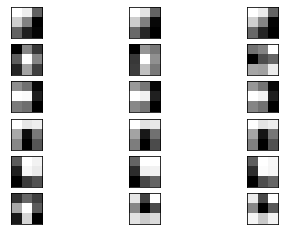

In [35]:
# plot first few filters
import matplotlib.pyplot as plt
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

Running the example creates a figure with six rows of three images, or 18 images, one row for each filter and one column for each channel

We can see that in some cases, the filter is the same across the channels (the first row), and in others, the filters differ (the last row).

The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. Using this intuition, we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.

Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. Visualizing all 64 filters in one image is feasible.

Sadly, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

# How to Visualize Feature Maps
The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In order to explore the visualization of feature maps, we need input for the VGG16 model that can be used to create activations. We will use a simple photograph of a bird. Specifically, a Robin, taken by Chris Heald and released under a permissive license.

In [36]:
# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


We can use this information and design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map.

For example, after loading the VGG model, we can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows.

In [37]:
# redefine model to output right after the first hidden layer
from tensorflow.keras import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)


In [38]:
# load the image with the required shape
from keras.preprocessing.image import load_img
img = load_img('/content/drive/MyDrive/bird.jpg', target_size=(224, 224))


Next, the image PIL object needs to be converted to a NumPy array of pixel data and expanded from a 3D array to a 4D array with the dimensions of [samples, rows, cols, channels], where we only have one sample.

In [39]:
# convert the image to an array
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np
# Importing the library
import tensorflow as tf
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [40]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [41]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

We know the result will be a feature map with 224x224x64. We can plot all 64 two-dimensional images as an 8×8 square of images.

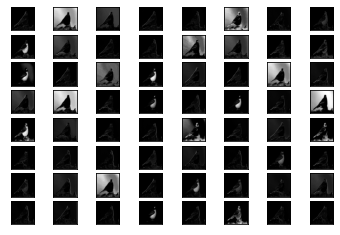

In [42]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

This is an interesting result and generally matches our expectation. We could update the example to plot the feature maps from the output of other specific convolutional layers.

Another approach would be to collect feature maps output from each block of the model in a single pass, then create an image of each.

There are five main blocks in the image (e.g. block1, block2, etc.) that end in a pooling layer. The layer indexes of the last convolutional layer in each block are [2, 5, 9, 13, 17].

We can define a new model that has multiple outputs, one feature map output for each of the last convolutional layer in each block; for example:

Making a prediction with this new model will result in a list of feature maps.

We know that the number of feature maps (e.g. depth or number of channels) in deeper layers is much more than 64, such as 256 or 512. Nevertheless, we can cap the number of feature maps visualized at 64 for consistency.

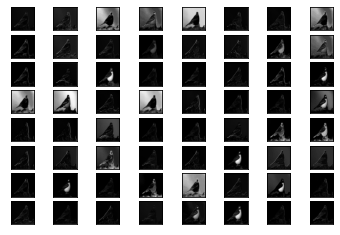

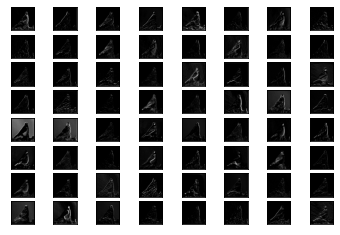

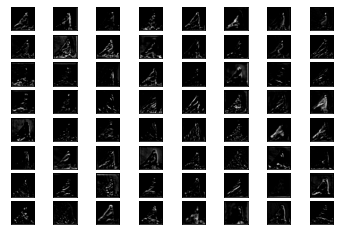

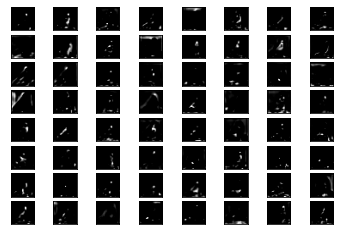

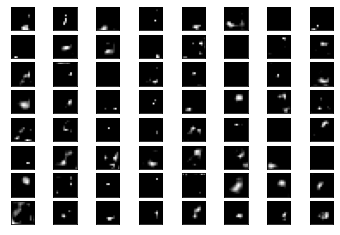

In [49]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()